## (미니 배치) 확률적 경사 하강법

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 실제값을 Y=8X+2 시뮬레이션하는 데이터 값 생성
* np.random.seed(0)
* 0과 1사이의 600개의 랜덤 값을 지정한다.
* X, y의 scatter plot으로 시각화 한다.

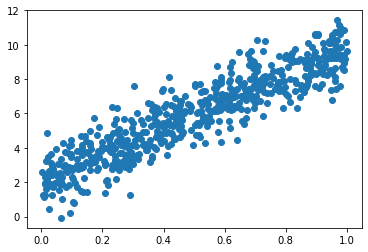

In [2]:
np.random.seed(0)
X = np.random.rand(600,1)
y = 8*X + 2 + np.random.randn(600,1)
plt.scatter(X, y)

### w0과 w1의 값을 최소화 할 수 있도록 업데이트 수행하는 함수 생성.
* def get_weight_updates(w1, w0, X, y, learning_rate=0.01):

In [3]:
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
         
    w0_factors = np.ones((N,1))

    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    
    return w1_update, w0_update

### 반복적으로 경사 하강법을 이용하여 get_weigth_updates()를 호출하여 w1과 w0를 업데이트 하는 함수 생성

In [4]:
def gradient_descent_steps(X, y, iters=10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

### 예측 오차 비용을 계산을 수행하는 함수 생성 및 경사 하강법 수행

In [5]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [6]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:6.389 w0:2.807
Gradient Descent Total Cost:1.1243


### 미니 배치 확률적 경사 하강법을 이용한 최적 비용함수 도출
* def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0

In [7]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [8]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 6.391 w0: 2.862
Stochastic Gradient Descent Total Cost:1.1323


# 영화 관객수 예측 모델

movies_data.csv 파일이 존재합니다.

영화에 관련된 여러가지 피처들을 통해 관객수를 예측해내는 것이 목표입니다.

- title : 영화의 제목
- distributor : 배급사
- genre : 장르
- release_time : 개봉일
- time : 상영시간(분)
- screening_rat : 상영등급
- director : 감독이름
- dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
- dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
- num_staff : 스텝수
- num_actor : 주연배우수
- box_off_num : 관객수

데이터셋 출처: https://dacon.io/competitions/open/235536/data

(학습을 위해 원래 데이터셋에서 test.csv는 제외하고, train.csv 파일만을 고려하여 진행했습니다.)

In [9]:
#필요한 라이브러리 import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
#데이터셋 불러오기
movie = pd.read_csv('movies_data.csv')

## 데이터 전처리, EDA 및 시각화

### movie 데이터를 살펴보고, 분석에 쓸모 없을 것 같은 column을 삭제하시오.
title, distributor, release_time, director 열 삭제

In [11]:
movie.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [12]:
movie.drop(['title', 'distributor', 'release_time', 'director'], axis="columns", inplace=True)
movie.columns

Index(['genre', 'time', 'screening_rat', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num'],
      dtype='object')

### movie 데이터에서 결측치가 있는지 확인하고, 그 결측치를 0으로 채우시오.
dir_prev_bfnum의 변수 설명에서 관객수가 알려지지 않은 영화는 제외한다고 했으므로 단순하게 0으로 결측치 처리

In [13]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genre           600 non-null    object 
 1   time            600 non-null    int64  
 2   screening_rat   600 non-null    object 
 3   dir_prev_bfnum  270 non-null    float64
 4   dir_prev_num    600 non-null    int64  
 5   num_staff       600 non-null    int64  
 6   num_actor       600 non-null    int64  
 7   box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 37.6+ KB


In [14]:
movie.fillna(0)

,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,액션,96,청소년 관람불가,0.00,0,91,2,23398
1,느와르,130,청소년 관람불가,1161602.50,2,387,3,7072501
2,액션,123,15세 관람가,220775.25,4,343,4,6959083
3,코미디,101,전체 관람가,23894.00,2,20,6,217866
4,코미디,108,15세 관람가,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...
595,드라마,111,청소년 관람불가,3833.00,1,510,7,1475091
596,드라마,127,15세 관람가,496061.00,1,286,6,1716438
597,공포,99,청소년 관람불가,0.00,0,123,4,2475
598,느와르,102,15세 관람가,0.00,0,431,4,2192525


In [15]:
#결측치가 잘 채워졌는지 확인
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genre           600 non-null    object 
 1   time            600 non-null    int64  
 2   screening_rat   600 non-null    object 
 3   dir_prev_bfnum  270 non-null    float64
 4   dir_prev_num    600 non-null    int64  
 5   num_staff       600 non-null    int64  
 6   num_actor       600 non-null    int64  
 7   box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 37.6+ KB


### 수치형 column들의 분포도를 히스토그램을 통해 시각적으로 살펴보고, 분포가 왜곡되어 있는 column이 있는지 판단하시오.

C:\Users\lovel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lovel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lovel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

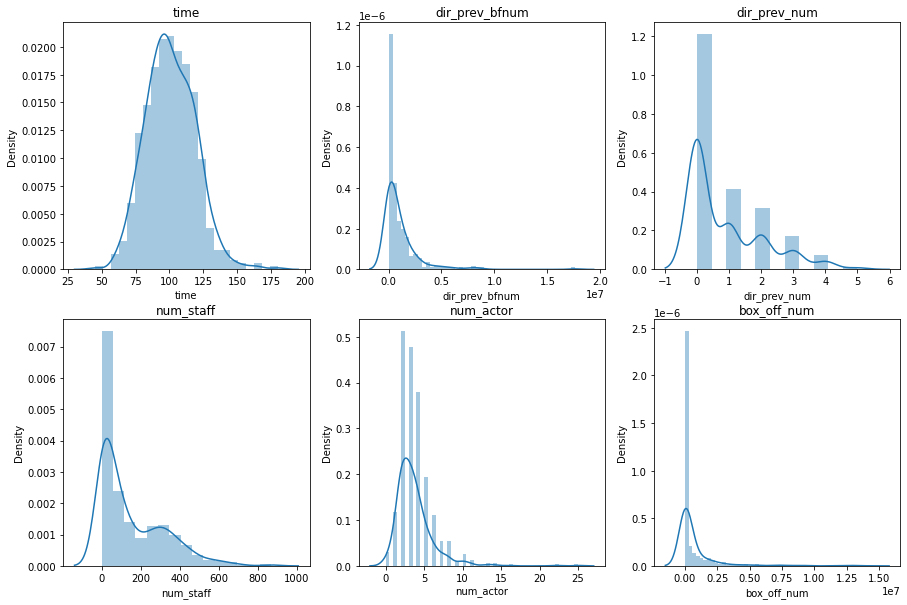

In [16]:
nc = movie.select_dtypes('number').columns

plt.figure(figsize=[15,10])
for i in range(len(nc)):
    plt.subplot(2,3,i+1)
    sns.distplot(movie[nc[i]])
    plt.title(nc[i])

### 위 문제에서 보았듯이, 타겟 변수인 box_off_num의 분포가 한 쪽으로 치우쳐져 있다. 타겟 변수에 대해 적절한 transformation을 적용하시오.

-> box_off_num(타겟 변수), dir_prev_bfnum, num_actor, num_staff의 분포가 왜곡되어 보임 (후에 파이프라인에서 스케일링 작업 할 것)

In [17]:
x = movie.drop('box_off_num', axis=1)
y = pd.DataFrame(movie.box_off_num)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
y_std = scaler.fit_transform(y)
y_std = pd.DataFrame(y_std, columns=['box_off_num'])

C:\Users\lovel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

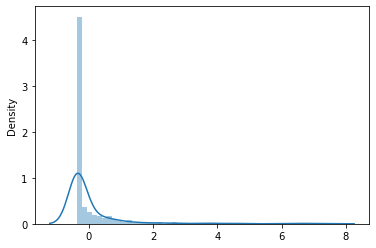

In [19]:
#잘 transfromation 되었는지 확인
sns.distplot(y_std)

## Linear Regression OLS로 학습/예측/평가 수행
* x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
* mse, rmse, r2_score을 출력
* 선형 회귀에 사용하는 설명 변수: ['time', 'dir_prev_bfnum', 'num_staff']

In [20]:
from sklearn.model_selection import train_test_split
from statsmodels.formula import api

x_train, x_test, y_train, y_test = train_test_split(x, y_std, train_size=0.8, test_size=0.2)

Train_xy = pd.concat([x[['time', 'dir_prev_bfnum', 'num_staff']], y_std.reset_index(drop=True)],axis=1)
a = Train_xy.columns.values

API = api.ols(formula='{} ~ {}'.format('box_off_num',' + '.join(i for i in ['time', 'dir_prev_bfnum', 'num_staff'])), data=Train_xy).fit()
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            box_off_num   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     38.16
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           1.53e-20
Time:                        22:05:45   Log-Likelihood:                -381.45
No. Observations:                 270   AIC:                             770.9
Df Residuals:                     266   BIC:                             785.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.1599      0.436     -4.949      0.000      -3.019      -1.301
time               0.0179      0.005      3.822      0.000       0.009       0.027
dir_prev_bfnum  8.226e-08   3.61e-08      2.279      0.023    1.12e-08    1.53e-07
num_staff          0.0018      0.000      3.844      0.000       0.001       0.003
==============================================================================
Omnibus:                      198.982   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2068.565
Skew:                           2.982   Prob(JB):                         0.00
Kurtosis:                      15.178   Cond. No.                     1.49e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### * 위에서 구한 모델의 절편과 회귀계수를 출력
* 회귀 계수는 round 하지 않고 그대로 출력한다.

### * cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구한다.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, x, y_std, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [nan nan nan nan nan]
 5 folds 의 개별 RMSE scores :  [nan nan nan nan nan]
 5 folds 의 평균 RMSE : nan 


C:\Users\lovel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lovel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lovel\anaconda3\lib\site-packages\sklearn\linear_model\_base.py", line 505, in fit
    X, y = self._validate_data(X, y, accept_sparse=['csr', 'csc', 'coo'],
  File "C:\Users\lovel\anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\lovel\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Users\lovel\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 795, in check_X_y
    X = check_array(X, accept_sparse

### numerical과 categorical로 구분하여 저장한 후, 수치형 변수와 범주형 변수를 확인한다.

### 위에서 지정한 numerical 변수 간의 상관관계를 heatmap을 통해 표현한다.

### 데이터에서 피쳐값과 타겟값을 분리하여 각각 X_movie, y_movie으로 저장하시오. (target은 box_off_num)

In [3]:
#데이터 확인 (X_movie)


In [4]:
#데이터 확인(y_movie)


### 피쳐값 중 카테고리 변수가 2가지 있다. 2개의 카테고리 변수가 어떤 값을 갖고 있는지 파악하시오. 이에 대해 Encoding을 진행하고 각각 어떻게 Encoding 되었는지 설명하시오. (LabelEncoder 사용)
ex) 드라마 4, 청불 3, ...

In [5]:
#genre, screening_rat 피쳐에 대해 Encoding 진행


In [6]:
#Encoding이 잘 되었는지 확인


### train_test_split()을 이용해 train set와 test set를 분리하시오.
- testset 의 size : 전체 데이터 셋의 20%
- 각 set의 이름 : X_train, X_test, y_train, y_test
- random_state = 123

In [7]:
#잘 분리되었는지 확인


## 선형 규제 모델 사용해보기

### 릿지
- 릿지 회귀를 적용하여 5개 폴드의 개별 RMSE와 평균 RMSE 점수를 구하시오. 
- random_state=123
- 성능 지표는 RMSE로 판단
- 폴드 개수는 5개, alpha=10

- 알파 값을 변화시켜가며 릿지를 수행하시오.
- alphas = [0 , 0.1 , 1 , 10 , 100]

- 위의 알파 값에 따른 피처별 회귀계수를 시각화하시오.

- 알파 값에 따른 피처별 회귀 계수 값을 데이터프레임 형태로 나타내시오.

### 라쏘
- get_linear_reg_eval 함수에 라쏘 회귀를 적용하여 5개 폴드의 평균 RMSE 점수를 구하시오. 
- random_state=123
- 성능 지표는 RMSE로 판단
- 폴드 개수는 5개, lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]

- 위의 알파 값에 따른 피처별 회귀계수를 시각화하시오.

- 알파 값에 따른 피처별 회귀 계수 값을 데이터프레임 형태로 나타내시오. 

### 엘라스틱 넷
- get_linear_reg_eval 함수에 엘라스틱 넷을 적용하여 5개 폴드의 평균 RMSE 점수를 구하시오. 
- random_state=123
- 성능 지표는 RMSE로 판단
- 폴드 개수는 5개, elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]

- 알파 값에 따르 피처별 회귀 계수 값을 데이터프레임 형태로 나타내시오. 

## 회귀 트리와 스태킹 앙상블
### 개별 회귀 트리 모델과 스태킹 회귀 모델의 성능을 비교하시오.
- 개별 회귀 트리 모델: DecisionTreeRegressor(random_state=123)
- 스태킹 앙상블에서의 base model : Ridge(alpha=8), Lasso(alpha=0.001), XGBRegressor(n_estimators=1000, learning_rate=0.05), LGBMRegressor(n_estimators=1000, learning_rate=0.05)
- 스태킹 앙상블에서의 최종 메타 model : Ridge(alpha=0.1)
- 성능 지표는 RMSE로 판단
- 폴드 개수는 5개

## 선형 회귀 모델과 파이프라인(Pipeline) 설계
전처리 문제 3번에서 보았듯이, 특정 변수들의 분포도가 치우쳐져 있다. 이를 위해 전처리를 하고 GridSearchCV를 하기 위해선 Pipeline을 설계해야 한다.

### 피처 변수들에 대해 Standard scaling을 하는 전처리 단계와 ElasticNet 모델을 포함하는 Pipeline을 설계하시오.
- ElasticNet 모델의 파라미터: alpha=0.1, l1_ratio=0.7

### 피처 변수들에 대해 Standard scaling을 하는 전처리 단계와 ElasticNet 모델을 포함하는 Pipeline을 설계하고, 테스트 세트에 대한 R2 score를 도출하시오.
- ElasticNet 모델의 파라미터: alpha=0.1, l1_ratio=0.7, random_state=123

### 파이프라인은 전처리 단계와 함께 GridSearchCV를 할 때 유용하게 사용된다. 앞서 만든 pipe를 토대로 GridSearchCV를 수행하고, 최적의 하이퍼 파라미터와 RMSE를 도출하시오.
- alpha : [0.1, 0.01, 0.05, 0.07]
- l1_ratio : [0, 0.5, 0.7, 0.8, 1]
- max_iter : [10,50,70,100,1000,2000]
- cv = 5, n_jobs=-1